<h1> Data Visualizations and Insights to the data </h1>

<h2> Introduction to the data set </h2>


http://www.cs.columbia.edu/CAVE/software/softlib/coil-100.php 
- COIL-100 was collected by the Center for Research on Intelligent Systems at the Department of Computer Science, Columbia University. 
- The database contains color images of 100 objects. 
- The objects were placed on a motorized turntable against a black background and images were taken at pose internals of 5 degrees. 
- This dataset was used in a real-time 100 object recognition system whereby a system sensor could identify the object and display its angular pose.


<h3>Content </h3>

- There are 7,200 images of 100 objects. Each object was turned on a turnable through 360 degrees to vary object pose with respect to a fixed color camera. 
- Images of the objects were taken at pose intervals of 5 degrees. This corresponds to 72 poses per object. There images were then size normalized. Objects have a wide variety of complex geometric and reflectance characteristics.

%pylab inline
import pickle
import sys
import cv2
import os

#### Reading all the images

In [115]:


def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [116]:
cd coil-100/


[Errno 2] No such file or directory: 'coil-100/'
/Users/bharadwajarya/Desktop/UNCC_Education/Fall 2020 Coursework/CV/CV project/coil-100


In [117]:
pwd

'/Users/bharadwajarya/Desktop/UNCC_Education/Fall 2020 Coursework/CV/CV project/coil-100'

In [118]:
#load_images_from_folder('/Users/bharadwajarya/Desktop/UNCC_Education/Fall 2020 Coursework/CV/CV project/coil-100')

In [119]:
pwd

'/Users/bharadwajarya/Desktop/UNCC_Education/Fall 2020 Coursework/CV/CV project/coil-100'

In [120]:
import glob
print(glob.glob)

<function glob at 0x7fef555b99d0>


In [121]:
pwd


'/Users/bharadwajarya/Desktop/UNCC_Education/Fall 2020 Coursework/CV/CV project/coil-100'

In [122]:
dict1 = {}
obj=[]

<h4> Reading images to create a dictionary for all unique set of images </h4>

In [173]:
import glob
import cv2 as cv
i=0
while(i<100):
    i+=1
    path = glob.glob("../coil-100/obj"+str(i)+"_*.png")
    dict1['obj'+str(i)]=path
    obj.append('obj'+str(i))

In [174]:
easy_images=dict1[obj[99]]

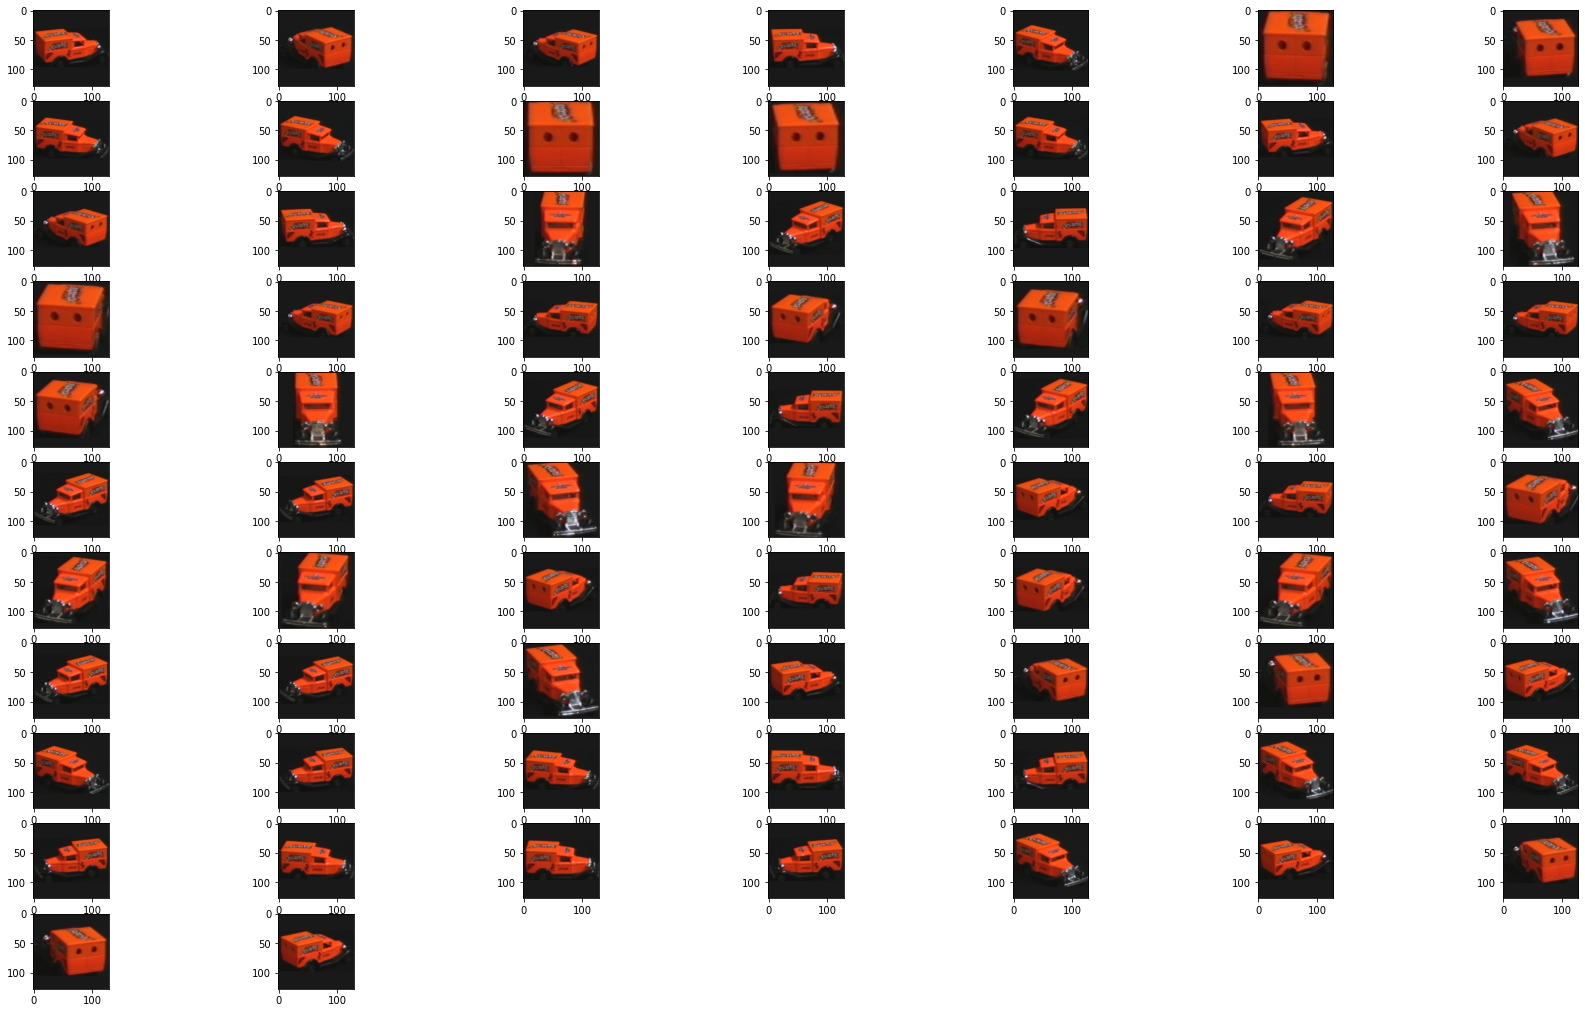

In [175]:
fig = figure(0, (30,18))
num_cols = 7
num_rows = int(ceil(len(easy_images)/num_cols))
for i, easy_image in enumerate(easy_images):
    im = imread(easy_image)
    fig.add_subplot(num_rows, num_cols, i+1)
   
    imshow(im)
    

### Retrieving the unique images present in all the 100 different objects

In [187]:
unique_images=[]
for i in range(1,101):
    unique_images.append(dict1['obj'+str(i)][10])

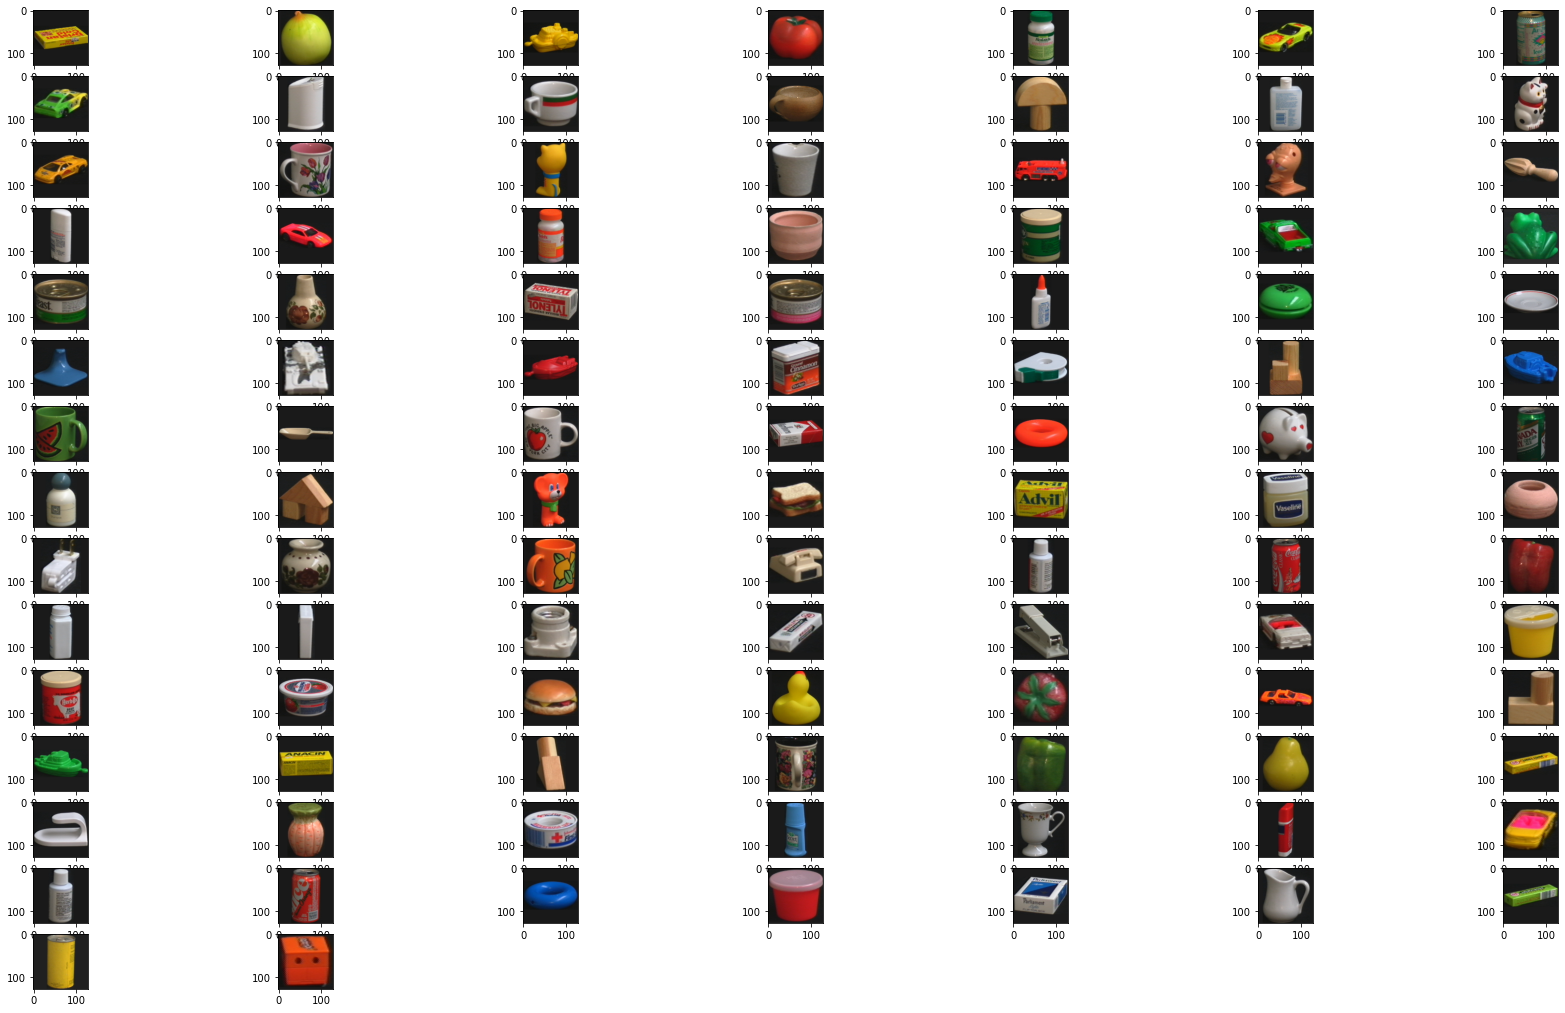

In [188]:
easy_images=unique_images
fig = figure(0, (30,18))
num_cols = 7
num_rows = int(ceil(len(easy_images)/num_cols))
for i, easy_image in enumerate(easy_images):
    im = imread(easy_image)
    fig.add_subplot(num_rows, num_cols, i+1)
   
    imshow(im)
    

### Detecting and visualizing differences between two images with OpenCV Subtract Module to comapre the pixel differcnes, given two images


In [189]:
import cv2

# load images
image1 = cv2.imread(dict1[obj[0]][10])
image2 = cv2.imread(dict1[obj[0]][5])

# compute difference
difference = cv2.subtract(image1, image2)

# color the mask red
Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
difference[mask != 255] = [255, 0, 0]

# add the red mask to the images to make the differences obvious
# image1[mask != 255] = [255, 0, 0]
# image2[mask != 255] = [255, 0, 0]

# store images
cv2.imwrite('diffOverImage1.png', image1)
cv2.imwrite('diffOverImage2.png', image1)
cv2.imwrite('diff.png', difference)

True

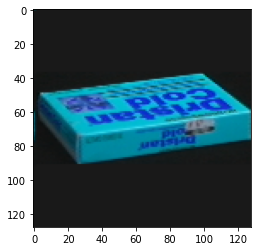

In [190]:

imshow(image1)


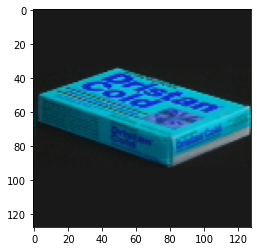

In [191]:
imshow(image2)


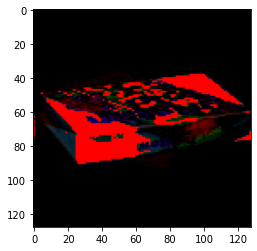

In [192]:
imshow(difference)